In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

In [2]:
df_GDP_pre = pd.read_csv('../../Data/Downloaded_Old/pre_GDP.csv')
df_GDP_post = pd.read_csv('../../Data/Downloaded_Old/post_GDP.csv')
df_pi_pre   = pd.read_csv('../../Data/Downloaded_Old/pre_price.csv')
df_pi_post  = pd.read_csv('../../Data/Downloaded_Old/post_price.csv')
df_GDP_def_post = pd.read_csv('../../Data/Downloaded_Old/post_GDP_def.csv')
df_pop = pd.read_csv('../../Data/Downloaded_Old/post_pop.csv')

In [3]:
linked_ind_34_to_55_agg = df_pi_pre.iloc[-1]['price_ind_agg'].astype(float)

In [4]:
linked_ind_34_to_55_agg

321.6

In [5]:
# price at 1990 is set to 100
p_1990 = 100

In [6]:
GDP_def_55_to_90_tot = p_1990 / df_GDP_def_post.loc[0]['tot_prv_GDP']

In [7]:
GDP_def_55_to_90_prm = p_1990 / df_GDP_def_post.loc[0]['prm_GDP'] 

In [8]:
GDP_def_55_to_90_tot

5.208333333333334

In [9]:
GDP_def_55_to_90_prm

5.319148936170213

In [10]:
# create defilator that converts variables in 1934 to 1936 prices to 1990 prices

In [11]:
GDP_def_55_to_90_col = [GDP_def_55_to_90_prm, GDP_def_55_to_90_tot]

In [12]:
GDP_def_34_to_90_col = [x * linked_ind_34_to_55_agg for x in GDP_def_55_to_90_col]

In [13]:
GDP_def_34_to_90_col

[1710.6382978723404, 1675.0000000000002]

In [14]:
col_org = ['prm_GDP', 'tot_GDP']
col_p90 = ['prm_GDP_p90', 'tot_GDP_p90']

In [15]:
# convert unit from 1 million yen to 1 billion yen
adjust_unit = 1000

In [16]:
for ind, col_name in enumerate(col_org):
    df_GDP_pre[col_p90[ind]] = df_GDP_pre[col_name] * GDP_def_34_to_90_col[ind] / adjust_unit

In [17]:
df_GDP_pre_picked = df_GDP_pre[['year_wst', 'prm_GDP_p90', 'tot_GDP_p90']]

In [18]:
df_GDP_post_picked = df_GDP_post[['year_wst', 'prm_GDP', 'tot_prv_GDP']]

In [19]:
df_GDP_post_picked.columns = ['year_wst', 'prm_GDP_p90', 'tot_GDP_p90']

In [20]:
df_GDP_pre_picked['non_prm_GDP_p90'] = df_GDP_pre_picked['tot_GDP_p90'] - df_GDP_pre_picked['prm_GDP_p90']

/var/folders/hb/3db8mbcj4l74ztsvqyx17yd00000gn/T/ipykernel_84572/18837114.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_GDP_pre_picked['non_prm_GDP_p90'] = df_GDP_pre_picked['tot_GDP_p90'] - df_GDP_pre_picked['prm_GDP_p90']


In [21]:
df_GDP_post_picked['non_prm_GDP_p90'] = df_GDP_post_picked['tot_GDP_p90'] - df_GDP_post_picked['prm_GDP_p90']

/var/folders/hb/3db8mbcj4l74ztsvqyx17yd00000gn/T/ipykernel_84572/3149985037.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_GDP_post_picked['non_prm_GDP_p90'] = df_GDP_post_picked['tot_GDP_p90'] - df_GDP_post_picked['prm_GDP_p90']


In [22]:
df_GDP_merged = pd.concat([df_GDP_pre_picked, df_GDP_post_picked])

In [23]:
df_GDP_merged

,year_wst,prm_GDP_p90,tot_GDP_p90,non_prm_GDP_p90
0,1885,2719.914894,6316.425,3596.510106
1,1886,2988.485106,6753.600,3765.114894
2,1887,3096.255319,7071.850,3975.594681
3,1888,3000.459574,6745.225,3744.765426
4,1889,2747.285106,7113.725,4366.439894
...,...,...,...,...
39,1994,10161.900000,433472.100,423310.200000
40,1995,9652.900000,442148.200,432495.300000
41,1996,9924.100000,461929.300,452005.200000
42,1997,9523.000000,469323.200,459800.200000


In [24]:
df_GDP_pop_merged = df_GDP_merged.join(df_pop.set_index('year_wst'), on = 'year_wst')

In [25]:
df_GDP_pop_merged['prm_GDP_p90_pc'] = df_GDP_pop_merged['prm_GDP_p90'] / df_GDP_pop_merged['tot_pop']

In [26]:
df_GDP_pop_merged['tot_GDP_p90_pc'] = df_GDP_pop_merged['tot_GDP_p90'] / df_GDP_pop_merged['tot_pop']

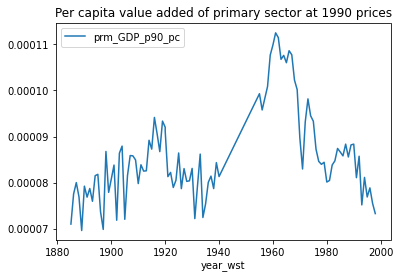

In [27]:
fig, ax = plt.subplots()
df_GDP_pop_merged.plot(x = 'year_wst', y = 'prm_GDP_p90_pc', ax = ax)
plt.title('Per capita value added of primary sector at 1990 prices')
plt.show()

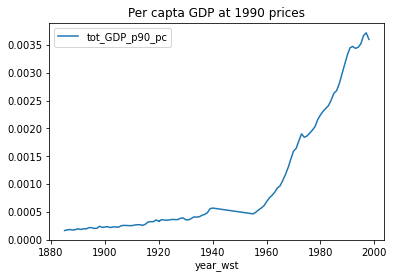

In [28]:
fig, ax = plt.subplots()
df_GDP_pop_merged.plot(x = 'year_wst', y = 'tot_GDP_p90_pc', ax = ax)
plt.title('Per capta GDP at 1990 prices')
plt.show()

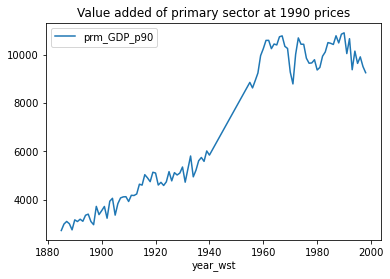

In [29]:
fig, ax = plt.subplots()
df_GDP_merged.plot(x = 'year_wst', y = 'prm_GDP_p90', ax = ax)
plt.title('Value added of primary sector at 1990 prices')
plt.show()

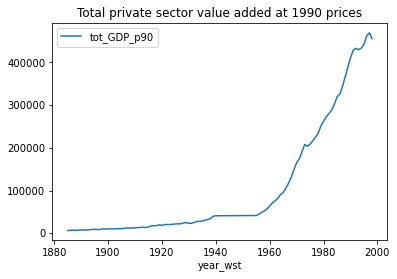

In [30]:
fig, ax = plt.subplots()
df_GDP_pop_merged.plot(x = 'year_wst', y = 'tot_GDP_p90', ax = ax)
plt.title('Total private sector value added at 1990 prices')
plt.show()

In [31]:
df_pre = df_GDP_pre_picked
df_post = df_GDP_post_picked

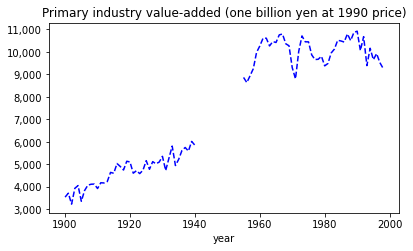

In [32]:
fig, ax = plt.subplots()

plt.rc('text', usetex=True)
plt.rc('font', family='serif')

#plt.rc('pgf', texsystem = 'xelatex')
#df_pre.plot(x = 'year_wst', y = 'prm_cap_p90_bil', 
df_pre[df_pre.year_wst >= 1900].plot(x = 'year_wst', y = 'prm_GDP_p90', 
#               label = r'Normalized cap wedge $\biggl(\frac{1 + \tau_{R,t}}{1 + \tau_{C,t}}-1 \biggr)$', 
               linestyle = '--',
               color = 'b',
               ax = ax)
#df_post.plot(x = 'year_wst', y = 'tot_cns_p90_mth',  
df_post[df_post.year_wst <= 2000].plot(x = 'year_wst', y = 'prm_GDP_p90',  
               linestyle = '--',
               color = 'b',
               ax = ax)
#ax.set_rasterized(True)
ax.legend_.remove()
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
plt.xlabel('year')
fig.set_size_inches(w=6.26894, h=3.5)
plt.title('Primary industry value-added (one billion yen at 1990 price)')
plt.savefig('../../Notes/comb_prm_GDP.pdf')
plt.show()

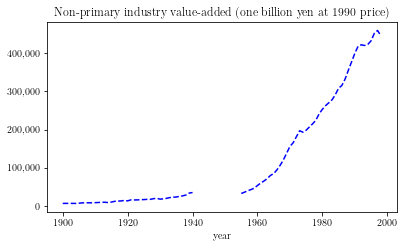

In [33]:
fig, ax = plt.subplots()

plt.rc('text', usetex=True)
plt.rc('font', family='serif')

#plt.rc('pgf', texsystem = 'xelatex')
#df_pre.plot(x = 'year_wst', y = 'prm_cap_p90_bil', 
df_pre[df_pre.year_wst >= 1900].plot(x = 'year_wst', y = 'non_prm_GDP_p90', 
#               label = r'Normalized cap wedge $\biggl(\frac{1 + \tau_{R,t}}{1 + \tau_{C,t}}-1 \biggr)$', 
               linestyle = '--',
               color = 'b',
               ax = ax)
#df_post.plot(x = 'year_wst', y = 'tot_cns_p90_mth',  
df_post[df_post.year_wst <= 2000].plot(x = 'year_wst', y = 'non_prm_GDP_p90',  
               linestyle = '--',
               color = 'b',
               ax = ax)
#ax.set_rasterized(True)
ax.legend_.remove()
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
plt.xlabel('year')
fig.set_size_inches(w=6.26894, h=3.5)
plt.title('Non-primary industry value-added (one billion yen at 1990 price)')
plt.savefig('../../Notes/comb_non_prm_GDP.pdf')
plt.show()

In [34]:
df_GDP_pop_pre = df_GDP_pre_picked.join(df_pop.set_index('year_wst'), on = 'year_wst')

In [35]:
df_GDP_pop_post = df_GDP_post_picked.join(df_pop.set_index('year_wst'), on = 'year_wst')

In [36]:
df_GDP_pop_post['GDP_pc_p90'] = df_GDP_pop_post['tot_GDP_p90'] / df_GDP_pop_post['tot_pop']
df_GDP_pop_pre['GDP_pc_p90'] = df_GDP_pop_pre['tot_GDP_p90'] / df_GDP_pop_pre['tot_pop']

In [37]:
df_GDP_pop_merged['GDP_pc_p90'] = df_GDP_pop_merged['tot_GDP_p90'] / df_GDP_pop_merged['tot_pop']

In [38]:
# convert unit from 1 billion yen to 1 million yen

In [39]:
df_GDP_pop_post['GDP_pc_p90_mil'] = df_GDP_pop_post['GDP_pc_p90'] * adjust_unit
df_GDP_pop_pre['GDP_pc_p90_mil'] = df_GDP_pop_pre['GDP_pc_p90'] * adjust_unit

In [40]:
df_GDP_pop_merged['GDP_pc_p90_mil'] = df_GDP_pop_merged['GDP_pc_p90'] * adjust_unit

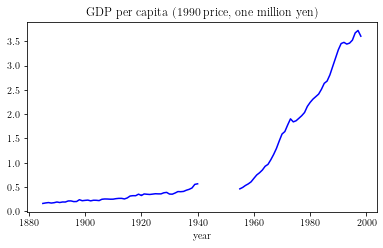

In [41]:
fig, ax = plt.subplots()

plt.rc('text', usetex=True)
plt.rc('font', family='serif')

#plt.rc('pgf', texsystem = 'xelatex')
df_GDP_pop_pre[df_GDP_pop_pre.year_wst >= 1885].plot(x = 'year_wst', y = 'GDP_pc_p90_mil', 
#               label = r'Normalized cap wedge $\biggl(\frac{1 + \tau_{R,t}}{1 + \tau_{C,t}}-1 \biggr)$', 
               #marker = '.',
               #linestyle = '--',
               color = 'b',
               ax = ax)
df_GDP_pop_post[df_GDP_pop_post.year_wst <= 2000].plot(x = 'year_wst', y = 'GDP_pc_p90_mil',
               #marker = '.',
               #linestyle = '--',
               color = 'b',
               ax = ax)

#ax.set_rasterized(True)
ax.legend_.remove()
#ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
plt.xlabel('year')
fig.set_size_inches(w=6.26894, h=3.5)
plt.title('GDP per capita (1990 price, one million yen)')
plt.savefig('../../Notes/Facts/GDP_pc.pgf')
plt.show()

In [42]:
df_GDP_pop_pre['GDP_pc_p90_mil_diff'] = df_GDP_pop_pre['GDP_pc_p90_mil'].diff()

In [43]:
df_GDP_pop_post['GDP_pc_p90_mil_diff'] = df_GDP_pop_post['GDP_pc_p90_mil'].diff()

In [44]:
df_GDP_pop_merged['GDP_pc_p90_mil_diff'] = df_GDP_pop_merged['GDP_pc_p90_mil'].diff()

In [45]:
# calculate rate of change
df_GDP_pop_pre['GDP_pc_p90_mil_roc'] = df_GDP_pop_pre['GDP_pc_p90_mil_diff']/ df_GDP_pop_pre['GDP_pc_p90_mil']
df_GDP_pop_post['GDP_pc_p90_mil_roc'] = df_GDP_pop_post['GDP_pc_p90_mil_diff']/ df_GDP_pop_post['GDP_pc_p90_mil']

In [46]:
df_GDP_pop_merged['GDP_pc_p90_mil_roc'] = df_GDP_pop_merged['GDP_pc_p90_mil_diff']/ df_GDP_pop_merged['GDP_pc_p90_mil']

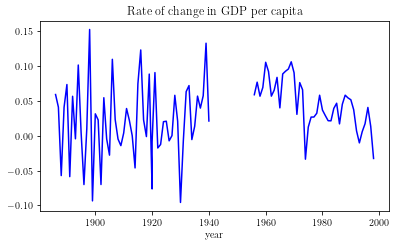

In [47]:
fig, ax = plt.subplots()

plt.rc('text', usetex=True)
plt.rc('font', family='serif')

#plt.rc('pgf', texsystem = 'xelatex')
df_GDP_pop_pre[df_GDP_pop_pre.year_wst >= 1885].plot(x = 'year_wst', y = 'GDP_pc_p90_mil_roc', 
#               label = r'Normalized cap wedge $\biggl(\frac{1 + \tau_{R,t}}{1 + \tau_{C,t}}-1 \biggr)$', 
               #marker = '.',
               #linestyle = '--',
               color = 'b',
               ax = ax)
df_GDP_pop_post[df_GDP_pop_post.year_wst <= 2000].plot(x = 'year_wst', y = 'GDP_pc_p90_mil_roc',
               #marker = '.',
               #linestyle = '--',
               color = 'b',
               ax = ax)

#ax.set_rasterized(True)
ax.legend_.remove()
#ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
plt.xlabel('year')
fig.set_size_inches(w=6.26894, h=3.5)
plt.title('Rate of change in GDP per capita')
plt.savefig('../../Notes/Facts/GDP_pc_roc.pgf')
plt.show()

In [48]:
# compute the average GDP per capita growth rate

In [49]:
cvt_to_pct = 100

In [50]:
df_GDP_pop_merged[df_GDP_pop_merged.year_wst <= 1940].GDP_pc_p90_mil_roc.mean() * cvt_to_pct

2.0333318896254413

In [51]:
df_GDP_pop_merged[(df_GDP_pop_merged.year_wst >= 1950) & (df_GDP_pop_merged.year_wst <= 1973)].GDP_pc_p90_mil_roc.mean() * cvt_to_pct

5.939120575134001

In [52]:
df_GDP_pop_merged[df_GDP_pop_merged.year_wst > 1973].GDP_pc_p90_mil_roc.mean()* cvt_to_pct

2.4893870646826377

In [55]:
#df['prm_emp_shr_diff_5yr_mean'] = df.prm_emp_shr_diff.rolling(window_5, min_periods = 1).mean()

In [56]:
# create 5 year average
window_5 = 5

In [57]:
df_GDP_pop_merged['GDP_pc_p90_mil_roc_5yr_mean'] = df_GDP_pop_merged.GDP_pc_p90_mil_roc.rolling(window_5, min_periods = 1).mean() * cvt_to_pct

In [58]:
df_GDP_pop_pre['GDP_pc_p90_mil_roc_5yr_mean'] = df_GDP_pop_pre.GDP_pc_p90_mil_roc.rolling(window_5, min_periods = 1).mean() * cvt_to_pct

In [59]:
df_GDP_pop_post['GDP_pc_p90_mil_roc_5yr_mean'] = df_GDP_pop_post.GDP_pc_p90_mil_roc.rolling(window_5, min_periods = 1).mean() * cvt_to_pct

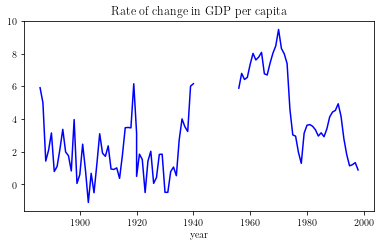

In [60]:
fig, ax = plt.subplots()

plt.rc('text', usetex=True)
plt.rc('font', family='serif')

#plt.rc('pgf', texsystem = 'xelatex')
df_GDP_pop_pre[df_GDP_pop_pre.year_wst >= 1885].plot(x = 'year_wst', y = 'GDP_pc_p90_mil_roc_5yr_mean', 
#               label = r'Normalized cap wedge $\biggl(\frac{1 + \tau_{R,t}}{1 + \tau_{C,t}}-1 \biggr)$', 
               #marker = '.',
               #linestyle = '--',
               color = 'b',
               ax = ax)
df_GDP_pop_post[df_GDP_pop_post.year_wst <= 2000].plot(x = 'year_wst', y = 'GDP_pc_p90_mil_roc_5yr_mean',
               #marker = '.',
               #linestyle = '--',
               color = 'b',
               ax = ax)

#ax.set_rasterized(True)
ax.legend_.remove()
#ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
plt.xlabel('year')
fig.set_size_inches(w=6.26894, h=3.5)
plt.title('Rate of change in GDP per capita')
plt.savefig('../../Notes/Facts/GDP_pc_roc.pgf')
plt.show()

In [61]:
df_GDP_pop_merged

,year_wst,prm_GDP_p90,tot_GDP_p90,non_prm_GDP_p90,tot_pop,prm_GDP_p90_pc,tot_GDP_p90_pc,GDP_pc_p90,GDP_pc_p90_mil,GDP_pc_p90_mil_diff,GDP_pc_p90_mil_roc,GDP_pc_p90_mil_roc_5yr_mean
0,1885,2719.914894,6316.425,3596.510106,38313000,0.000071,0.000165,0.000165,0.164864,NaN,NaN,NaN
1,1886,2988.485106,6753.600,3765.114894,38541000,0.000078,0.000175,0.000175,0.175232,0.010368,0.059166,5.916638
2,1887,3096.255319,7071.850,3975.594681,38703000,0.000080,0.000183,0.000183,0.182721,0.007489,0.040988,5.007730
3,1888,3000.459574,6745.225,3744.765426,39029000,0.000077,0.000173,0.000173,0.172826,-0.009895,-0.057254,1.430015
4,1889,2747.285106,7113.725,4366.439894,39473000,0.000070,0.000180,0.000180,0.180217,0.007392,0.041014,2.097872
...,...,...,...,...,...,...,...,...,...,...,...,...
39,1994,10161.900000,433472.100,423310.200000,125265000,0.000081,0.003460,0.003460,3.460441,0.020020,0.005785,1.829009
40,1995,9652.900000,442148.200,432495.300000,125570000,0.000077,0.003521,0.003521,3.521129,0.060689,0.017236,1.140765
41,1996,9924.100000,461929.300,452005.200000,125859000,0.000079,0.003670,0.003670,3.670213,0.149083,0.040620,1.206741
42,1997,9523.000000,469323.200,459800.200000,126157000,0.000075,0.003720,0.003720,3.720152,0.049939,0.013424,1.335490


In [62]:
df_GDP_pop_post

,year_wst,prm_GDP_p90,tot_GDP_p90,non_prm_GDP_p90,tot_pop,GDP_pc_p90,GDP_pc_p90_mil,GDP_pc_p90_mil_diff,GDP_pc_p90_mil_roc,GDP_pc_p90_mil_roc_5yr_mean
0,1955,8863.9,41457.1,32593.2,89276000,0.000464,0.464370,NaN,NaN,NaN
1,1956,8635.4,44493.9,35858.5,90172000,0.000493,0.493434,0.029064,0.058901,5.890076
2,1957,8938.6,48606.4,39667.8,90928000,0.000535,0.534559,0.041126,0.076934,6.791717
3,1958,9254.5,52007.9,42753.4,91767000,0.000567,0.566739,0.032179,0.056780,6.420475
4,1959,9975.0,56416.2,46441.2,92641000,0.000609,0.608977,0.042238,0.069359,6.549331
5,1960,10263.0,63601.6,53338.6,93419000,0.000681,0.680821,0.071844,0.105526,7.349983
6,1961,10607.1,70716.5,60109.4,94287000,0.000750,0.750013,0.069192,0.092255,8.017067
7,1962,10609.0,75690.6,65081.6,95181000,0.000795,0.795228,0.045215,0.056858,7.615548
8,1963,10264.8,81821.8,71557.0,96156000,0.000851,0.850928,0.055700,0.065458,7.789100
9,1964,10457.0,90259.7,79802.7,97182000,0.000929,0.928770,0.077842,0.083812,8.078161


In [63]:
df_GDP_pop_pre['GDP_pc_p90_mil_log'] = np.log(df_GDP_pop_pre['GDP_pc_p90_mil'])

In [64]:
df_GDP_pop_post['GDP_pc_p90_mil_log'] = np.log(df_GDP_pop_post['GDP_pc_p90_mil'])

In [65]:
df_GDP_pop_merged['GDP_pc_p90_mil_log'] = np.log(df_GDP_pop_merged['GDP_pc_p90_mil'])

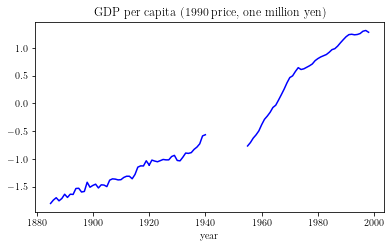

In [66]:
fig, ax = plt.subplots()

plt.rc('text', usetex=True)
plt.rc('font', family='serif')

#plt.rc('pgf', texsystem = 'xelatex')
df_GDP_pop_pre[df_GDP_pop_pre.year_wst >= 1885].plot(x = 'year_wst', y = 'GDP_pc_p90_mil_log', 
#               label = r'Normalized cap wedge $\biggl(\frac{1 + \tau_{R,t}}{1 + \tau_{C,t}}-1 \biggr)$', 
               #marker = '.',
               #linestyle = '--',
               color = 'b',
               ax = ax)
df_GDP_pop_post[df_GDP_pop_post.year_wst <= 2000].plot(x = 'year_wst', y = 'GDP_pc_p90_mil_log',
               #marker = '.',
               #linestyle = '--',
               color = 'b',
               ax = ax)

#ax.set_rasterized(True)
ax.legend_.remove()
#ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
plt.xlabel('year')
fig.set_size_inches(w=6.26894, h=3.5)
plt.title('GDP per capita (1990 price, one million yen)')
plt.savefig('../../Notes/Facts/GDP_pc_mil_log.pgf')
plt.show()

In [67]:
million = 1e6

In [68]:
million

1000000.0

In [69]:
df_GDP_pop_pre['GDP_pc_p90_log'] = np.log(df_GDP_pop_pre['GDP_pc_p90_mil'] * million)

In [70]:
df_GDP_pop_post['GDP_pc_p90_log'] = np.log(df_GDP_pop_post['GDP_pc_p90_mil'] * million)

In [71]:
df_GDP_pop_merged['GDP_pc_p90_log'] = np.log(df_GDP_pop_merged['GDP_pc_p90_mil'] * million)

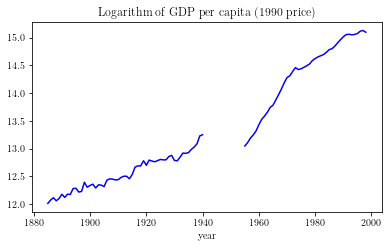

In [73]:
fig, ax = plt.subplots()

plt.rc('text', usetex=True)
plt.rc('font', family='serif')

#plt.rc('pgf', texsystem = 'xelatex')
df_GDP_pop_pre[df_GDP_pop_pre.year_wst >= 1885].plot(x = 'year_wst', y = 'GDP_pc_p90_log', 
#               label = r'Normalized cap wedge $\biggl(\frac{1 + \tau_{R,t}}{1 + \tau_{C,t}}-1 \biggr)$', 
               #marker = '.',
               #linestyle = '--',
               color = 'b',
               ax = ax)
df_GDP_pop_post[df_GDP_pop_post.year_wst <= 2000].plot(x = 'year_wst', y = 'GDP_pc_p90_log',
               #marker = '.',
               #linestyle = '--',
               color = 'b',
               ax = ax)

#ax.set_rasterized(True)
ax.legend_.remove()
#ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
plt.xlabel('year')
fig.set_size_inches(w=6.26894, h=3.5)
plt.title('Logarithm of GDP per capita (1990 price)')
plt.savefig('../../Notes/Facts/GDP_pc_log.pgf')
plt.savefig('../../Graphs/pdf/GDP_pc_log.pdf')
plt.show()

In [83]:
df_GDP_pop_pre['GDP_pc_p90_log'] = np.log(df_GDP_pop_pre['GDP_pc_p90'])

In [84]:
df_GDP_pop_post['GDP_pc_p90_log'] = np.log(df_GDP_pop_post['GDP_pc_p90'])

In [85]:
df_GDP_pop_merged['GDP_pc_p90_log'] = np.log(df_GDP_pop_merged['GDP_pc_p90'])

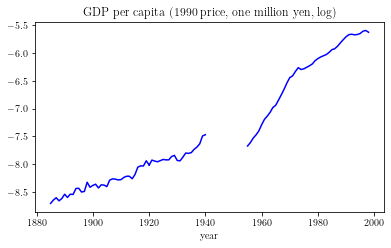

In [91]:
fig, ax = plt.subplots()

plt.rc('text', usetex=True)
plt.rc('font', family='serif')

#plt.rc('pgf', texsystem = 'xelatex')
df_GDP_pop_pre[df_GDP_pop_pre.year_wst >= 1885].plot(x = 'year_wst', y = 'GDP_pc_p90_log', 
#               label = r'Normalized cap wedge $\biggl(\frac{1 + \tau_{R,t}}{1 + \tau_{C,t}}-1 \biggr)$', 
               #marker = '.',
               #linestyle = '--',
               color = 'b',
               ax = ax)
df_GDP_pop_post[df_GDP_pop_post.year_wst <= 2000].plot(x = 'year_wst', y = 'GDP_pc_p90_log',
               #marker = '.',
               #linestyle = '--',
               color = 'b',
               ax = ax)

#ax.set_rasterized(True)
ax.legend_.remove()
#ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
plt.xlabel('year')
fig.set_size_inches(w=6.26894, h=3.5)
plt.title('GDP per capita (1990 price, one million yen, log)')
plt.savefig('../../Notes/Facts/GDP_pc_log.pgf')
plt.show()

In [78]:
df_GDP_pop_pre['non_prm_GDP_p90_log'] = np.log(df_GDP_pop_pre['non_prm_GDP_p90'])

In [79]:
df_GDP_pop_post['non_prm_GDP_p90_log'] = np.log(df_GDP_pop_post['non_prm_GDP_p90'])

In [80]:
df_GDP_pop_merged['non_prm_GDP_p90_log'] = np.log(df_GDP_pop_merged['non_prm_GDP_p90'])

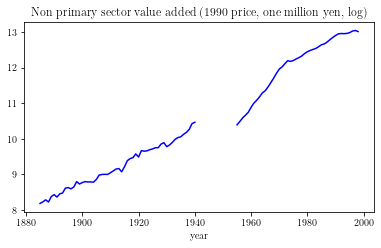

In [94]:
fig, ax = plt.subplots()

plt.rc('text', usetex=True)
plt.rc('font', family='serif')

#plt.rc('pgf', texsystem = 'xelatex')
df_GDP_pop_pre[df_GDP_pop_pre.year_wst >= 1885].plot(x = 'year_wst', y = 'non_prm_GDP_p90_log', 
#               label = r'Normalized cap wedge $\biggl(\frac{1 + \tau_{R,t}}{1 + \tau_{C,t}}-1 \biggr)$', 
               #marker = '.',
               #linestyle = '--',
               color = 'b',
               ax = ax)
df_GDP_pop_post[df_GDP_pop_post.year_wst <= 2000].plot(x = 'year_wst', y = 'non_prm_GDP_p90_log',
               #marker = '.',
               #linestyle = '--',
               color = 'b',
               ax = ax)

#ax.set_rasterized(True)
ax.legend_.remove()
#ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
plt.xlabel('year')
fig.set_size_inches(w=6.26894, h=3.5)
plt.title('Non primary sector value added (1990 price, one million yen, log)')
plt.savefig('../../Notes/Facts/non_prm_GDP_log.pgf')
plt.show()

In [87]:
df_GDP_pop_pre['prm_GDP_p90_log'] = np.log(df_GDP_pop_pre['prm_GDP_p90'])

In [88]:
df_GDP_pop_post['prm_GDP_p90_log'] = np.log(df_GDP_pop_post['prm_GDP_p90'])

In [89]:
df_GDP_pop_merged['prm_GDP_p90_log'] = np.log(df_GDP_pop_merged['prm_GDP_p90'])

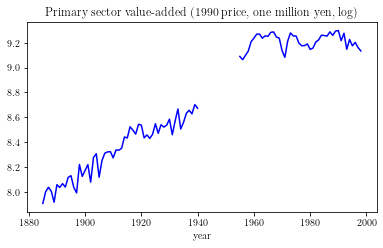

In [95]:
fig, ax = plt.subplots()

plt.rc('text', usetex=True)
plt.rc('font', family='serif')

#plt.rc('pgf', texsystem = 'xelatex')
df_GDP_pop_pre[df_GDP_pop_pre.year_wst >= 1885].plot(x = 'year_wst', y = 'prm_GDP_p90_log', 
#               label = r'Normalized cap wedge $\biggl(\frac{1 + \tau_{R,t}}{1 + \tau_{C,t}}-1 \biggr)$', 
               #marker = '.',
               #linestyle = '--',
               color = 'b',
               ax = ax)
df_GDP_pop_post[df_GDP_pop_post.year_wst <= 2000].plot(x = 'year_wst', y = 'prm_GDP_p90_log',
               #marker = '.',
               #linestyle = '--',
               color = 'b',
               ax = ax)

#ax.set_rasterized(True)
ax.legend_.remove()
#ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
plt.xlabel('year')
fig.set_size_inches(w=6.26894, h=3.5)
plt.title('Primary sector value-added (1990 price, one million yen, log)')
plt.savefig('../../Notes/Facts/prm_GDP_log.pgf')
plt.show()

In [116]:
df_GDP_pop_post

,year_wst,prm_GDP_p90,tot_GDP_p90,non_prm_GDP_p90,tot_pop,GDP_pc_p90,GDP_pc_p90_mil,GDP_pc_p90_mil_diff,GDP_pc_p90_mil_roc,GDP_pc_p90_mil_roc_5yr_mean,GDP_pc_p90_mil_log,non_prm_GDP_p90_log,GDP_pc_p90_log,prm_GDP_p90_log
0,1955,8863.9,41457.1,32593.2,89276000,0.000464,0.464370,NaN,NaN,NaN,-0.767074,10.391859,13.048437,9.089742
1,1956,8635.4,44493.9,35858.5,90172000,0.000493,0.493434,0.029064,0.058901,5.890076,-0.706367,10.487336,13.109144,9.063625
2,1957,8938.6,48606.4,39667.8,90928000,0.000535,0.534559,0.041126,0.076934,6.791717,-0.626313,10.588295,13.189198,9.098134
3,1958,9254.5,52007.9,42753.4,91767000,0.000567,0.566739,0.032179,0.056780,6.420475,-0.567857,10.663204,13.247653,9.132865
4,1959,9975.0,56416.2,46441.2,92641000,0.000609,0.608977,0.042238,0.069359,6.549331,-0.495975,10.745942,13.319535,9.207837
5,1960,10263.0,63601.6,53338.6,93419000,0.000681,0.680821,0.071844,0.105526,7.349983,-0.384456,10.884416,13.431054,9.236300
6,1961,10607.1,70716.5,60109.4,94287000,0.000750,0.750013,0.069192,0.092255,8.017067,-0.287664,11.003922,13.527846,9.269279
7,1962,10609.0,75690.6,65081.6,95181000,0.000795,0.795228,0.045215,0.056858,7.615548,-0.229126,11.083397,13.586384,9.269458
8,1963,10264.8,81821.8,71557.0,96156000,0.000851,0.850928,0.055700,0.065458,7.789100,-0.161428,11.178250,13.654082,9.236476
9,1964,10457.0,90259.7,79802.7,97182000,0.000929,0.928770,0.077842,0.083812,8.078161,-0.073894,11.287313,13.741616,9.255027


In [117]:
GDP_pc_1885 = df_GDP_pop_pre[df_GDP_pop_pre.year_wst == 1885].GDP_pc_p90.tolist()[0]

In [118]:
GDP_pc_1940 = df_GDP_pop_pre[df_GDP_pop_pre.year_wst == 1940].GDP_pc_p90.tolist()[0]

In [119]:
GDP_pc_1955 = df_GDP_pop_post[df_GDP_pop_post.year_wst == 1955].GDP_pc_p90.tolist()[0]

In [120]:
GDP_pc_1973 = df_GDP_pop_post[df_GDP_pop_post.year_wst == 1973].GDP_pc_p90.tolist()[0]

In [121]:
GDP_pc_1974 = df_GDP_pop_post[df_GDP_pop_post.year_wst == 1974].GDP_pc_p90.tolist()[0]

In [122]:
GDP_pc_1998 = df_GDP_pop_post[df_GDP_pop_post.year_wst == 1998].GDP_pc_p90.tolist()[0]

In [123]:
(GDP_pc_1940/GDP_pc_1885)**(1/(1940-1885)) - 1

0.022764211604001883

In [124]:
(GDP_pc_1973/GDP_pc_1955)**(1/(1973-1955)) - 1

0.08153487906934442

In [125]:
(GDP_pc_1998/GDP_pc_1974)**(1/(1998-1974)) - 1

0.028352261812845336